In [15]:
import nltk
import numpy as np
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
from nltk.text import Text
import re
from nltk.probability import FreqDist

In [2]:
file = open('nls-text-indiaPapers/74457530.txt','r')
raw_data = file.read()
tokens = word_tokenize(raw_data)
lower_tokens = [word.lower() for word in tokens]

fdist = FreqDist(lower_tokens)

##### Graph
The plot() method can be called to draw the frequency distribution as a graph for the most common tokens in the text.

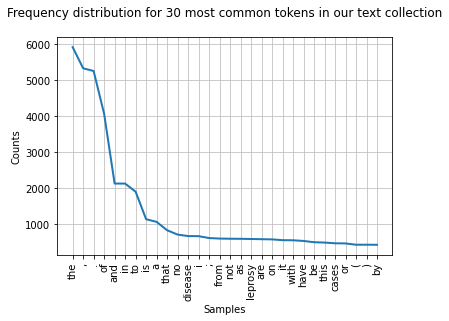

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection\n'}, xlabel='Samples', ylabel='Counts'>

In [3]:
fdist.plot(30,title='Frequency distribution for 30 most common tokens in our text collection\n')

##### You can see that the distribution contains a lot of non-content words like “the”, “of”, “and” etc. (we call these stop words) and punctuation. We can remove them before drawing the graph. We need to import stopwords from the corpus package to do this. The list of stop words is combined with a list of punctuation and a list of single digits using + signs into a new list of items to be ignored.

In [4]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIPTO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Using the string library we take the list of punctuations and digits
# Also we are taking the stopwords of English Language
# We are making a set of these to get only single occurence of the characters
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))

filtered_text = [w for w in lower_tokens if not w in remove_these]
fdist_filtered = FreqDist(filtered_text)

In [6]:
fdist_filtered

FreqDist({'disease': 653, 'leprosy': 572, 'cases': 452, 'lepers': 409, 'district': 401, '...': 329, 'surgeon': 300, 'one': 265, 'years': 264, 'dated': 240, ...})

In [7]:
fdist.N()

93568

In [8]:
fdist_filtered.N()

44297

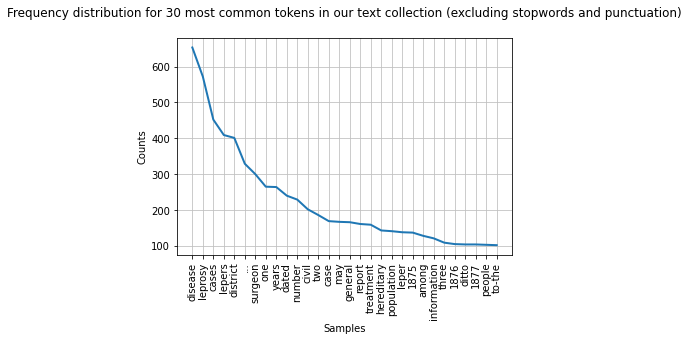

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)\n'}, xlabel='Samples', ylabel='Counts'>

In [9]:
fdist_filtered.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)\n')

##### Word cloud

We can also present the filtered tokens as a word cloud. This allows us the have an overview of the corpus using the WordCloud( ).generate_from_frequencies() method. The input to this method is a frequency dictionary of all tokens and their counts in the text. This needs to be created first by importing the Counter package in python and creating a dictionary using the filtered_text variable as input.

We generate the WordCloud using the frequency dictionary and plot the figure to size. We can show the plot using plt.show().

In [10]:
from collections import Counter
from wordcloud import WordCloud

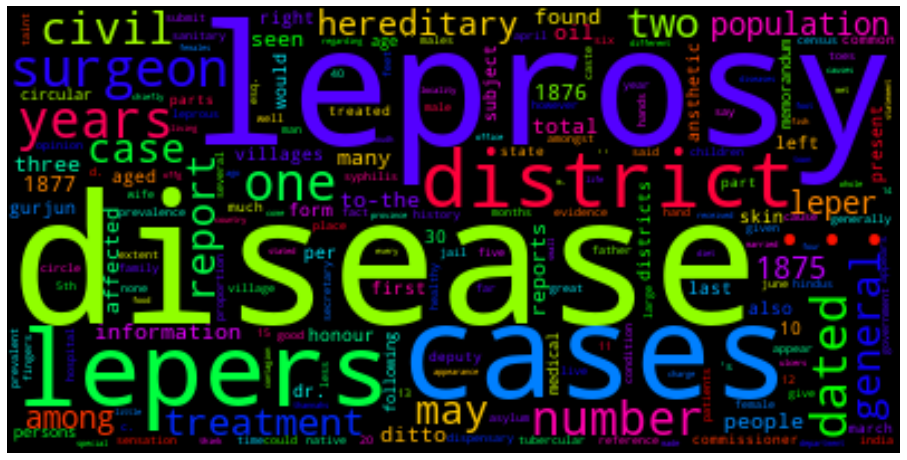

In [11]:
dictionary = Counter(filtered_text)

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)

plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
fdist_filtered

FreqDist({'disease': 653, 'leprosy': 572, 'cases': 452, 'lepers': 409, 'district': 401, '...': 329, 'surgeon': 300, 'one': 265, 'years': 264, 'dated': 240, ...})

##### Shaped word cloud

And now a shaped word cloud for a bit of fun, if there is time at the end of day 1. This will present your workcloud in the shape of a given image.

You need a shape file which we provide for you in the form of the medical symbol:

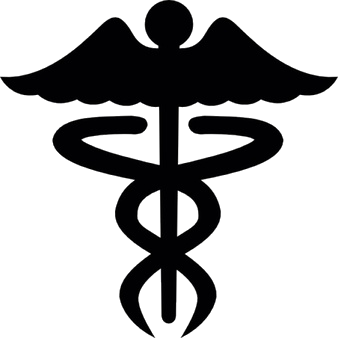

The mask image needs to have a transparent background so that only the black shape is used as a mask for the word cloud.

To display the shaped word cloud you need to import the Image package form PIL as well as numpy. The image first needs to be opened and converted into a numpy array which we call med_mask. A customised colour map (cmap) is created to present the words in black font. Then the word cloud is created with a white background, the mask and the colour map set as parameters and generated from the dictionary containing the number of occurrences for each word.

(-0.5, 337.5, 337.5, -0.5)

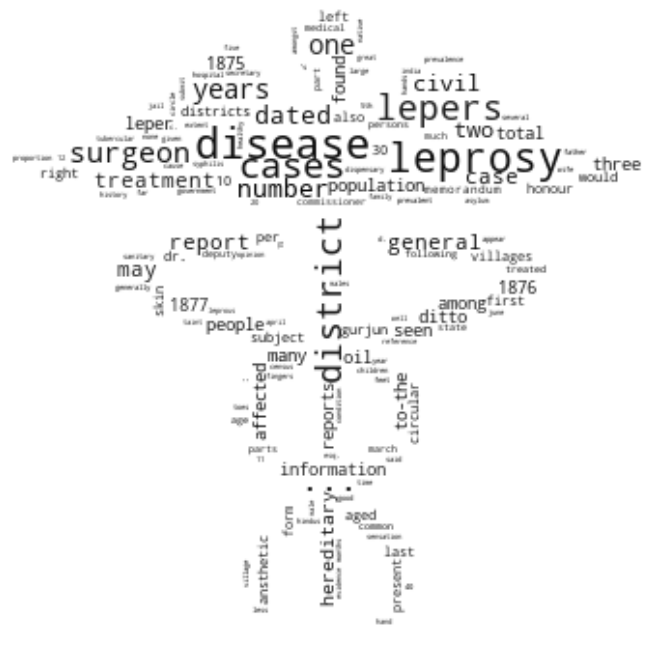

In [16]:
from PIL import Image

med_mask = np.array(Image.open('medical.png'))

# Custom Colormap
from matplotlib.colors import LinearSegmentedColormap

colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(background_color="white", mask=med_mask, colormap=cmap)
wc.generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")


Change the last frequency distribution plot to not show any the following strings: “…”, “1876”, “1877”, “one”, “two”, “three”. Consider adding them to the remove_these list. Hint: You can create a list of strings of all numbers between 0 and 10000000 by calling list(map(str, range(0,1000000)))

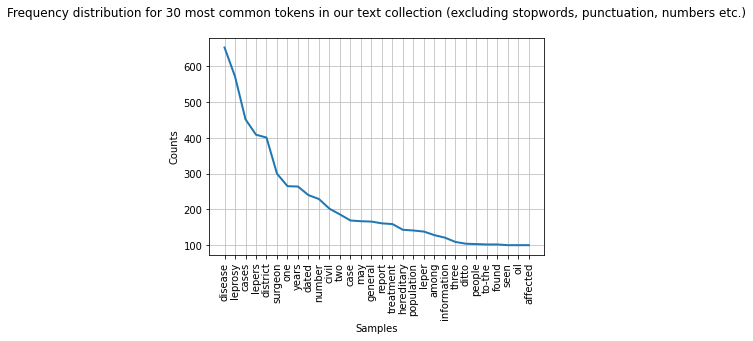

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords, punctuation, numbers etc.)\n'}, xlabel='Samples', ylabel='Counts'>

In [18]:
numbers=list(map(str, range(0,1000000)))
otherTokens=["..."]

remove_these = set(stopwords.words('english') + list(string.punctuation) + numbers + otherTokens)

filtered_text_new = [w for w in lower_tokens if not w in remove_these]

fdist_filtered = FreqDist(filtered_text_new)
fdist_filtered.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords, punctuation, numbers etc.)\n')

Redraw the word cloud with the updated filtered_text variable (after removing the strings in Task 1).

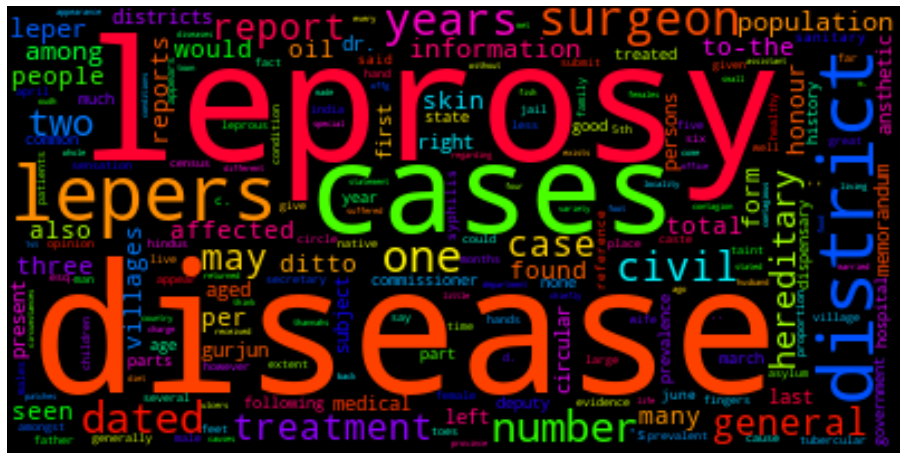

In [19]:
dictionary_new = Counter(filtered_text)

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary_new)

plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()